# 一、前言与目录

## 作者

---

李昕达

2016级 哈尔滨工程大学 自动化学院

2020级 哈尔滨工业大学 仪器科学与工程学院

-----

email：i@lixinda.me

wechat：lixinda_

## 前言

**科学计算Python2小时**是一份专门为2021年（及之后）美国大学生学建模竞赛（国赛或许也可）准备的，在哈尔滨工程大学进入美国实体清单之后，为应对MATLAB可能不能使用的情况，使用Python来面对数学建模中一系列使用计算机解决数学建模实际问题的状况。

两小时指的不是你可以在两小时内学会Python这门编程语言，并且在数学建模中熟练地运用它，而是说您读完这篇文档并且理解它，可能需要至少两个小时。

在实际拿到对应的美国大学生数学建模竞赛题目之后，你可能需要大量的时间来挖掘出所需要的算法，并且在我接下来所讲内容中找到对应的解决方案（代码），那这里面分成两个部分，一个是算法，另外一个是解决方案，在本篇文档中不会提到任何关于算法的内容，但会提出一些实际的应用环境，并且给出对应的解决方案。**所以这篇文章的作用就是提供一个解决方案的集合，在你提出自己的模型或者自己的算法之后，在这个集合中找到实现它的途径。**

不可能在一篇短短的文章中，完备的提出所有的解决方案，所以我会尽可能的引入一些外部的资源，并给出一个他们大概的描述。这些外部资源作为拓展的阅读材料，需要在建模之前进行一个概略的阅读，至少需要了解他们的标题

这篇文章使用jupyter notebook书写。在Python所集成的IPython环境下使用网页端的jupyter，来进行交互式的Python程序编写以及文档的撰写，我将会同步提交ipynb（**IPY**thon **N**ote**B**ook）文件（但这个文件不装环境打不开）和渲染得到的PDF文件（或html）（这个一定能打开，但格式不一定好看）

## 文档内容

1. 前言和目录
2. Python基础
3. 数据读取
4. Python的数学基础：numpy
5. 数据清洗/数据处理：pandas
6. 连续数学：scipy
7. 符号/符号计算：sympy
8. 离散事件仿真：simpy
9. 绘图：matplotlib & seaborn

## 其他

我参加过2018年2019年的美国大学生数学建模竞赛，并且拿到了H和M，2020年因为已经确定了保研资格，所以并没有参加美赛，但是在知乎上写了两篇思路，据知乎上的私信反馈，也有几位同学拿到了比较好的成绩。今年美赛也并没有报名参赛，所以可能会有机会写一篇解析。到时候有思路的话，会跟大家分享，仅供讨论。

文章链接：

**2020美赛D：哈士奇队**
https://zhuanlan.zhihu.com/p/106851263

**2020美赛B：玩沙子！**
https://zhuanlan.zhihu.com/p/111229457

# 二、Python基础

首先要说明的是，目前常用的Python版本包括Python2和Python3，二者有一些语法和一些包是互不兼容的。部分Python的拓展库已经放弃了对Python2的支持所以本分文档推荐使用Python3作为解释器。当然对于数学建模而言，Python2也是一个可选的方案，但是可能会在使用过程中遇到一些问题，如果你是Python2的忠实拥护者，那么使用Python2来完成数学建模工作，也未尝不可。

接下来我们可能需要理清几个概念**解释器**，**文本编辑器**，**IDE**和**包管理工具**

**解释器**

一般我们编写Python源程序时，会得到一个后缀名为py的文件，当你想要运行这份代码的时候，操作系统是不能够认识py这份文件怎怎么样工作的，这时就需要一个解释器，**将这份文件翻译成机器可以识别的机器码**。

通常我们在网络上看到一些教程说，我们可以直接去Python的官方网站上下载某一个版本的Python，并将它们安装在我们自己的电脑上，那么这里我们所安装的Python其实就是解释器。

如果说的更明确一些，他应该被称为CPython解释器，一个用C语言写的Python解释器，当我们在命令行中运行下面这行代码的时候，其实就是它在执行作用

` python demo.py `

IPython是另外一种Python解释器，与其说它跟CPython上有什么不同，还不如说它只是在CPython的交互方式上进行了一些改进,IPython使用代码块的方式展现和运行代码。

 CPython使用`>>>`做命令提示符，而IPython使用`IN[num]`作为命令提示符,从这里可以就可以很容易的把二者分辨开.
 
 比如在命令行中进行Python或者在pycharm这类软件中运行Python使用的都是CPython解释器
 
 而在jupyter notebook或者spyder这样的软件中运行，用的都是IPython解释器
 
 二者并没有什么明显的区别，当我们已经完成了功能的测试时，我们可以使用CPython来进行大规模的计算，到我们测试功能时，我们可以使用IPython来进行交互式的代码书写。如果要进行一些展示性的或者教程性的代码书写的时候，使用IPython一般是比较友好的一种展示方式。
 
 **文本编辑器**
 
 就像电脑中最常用的**记事本**软件一样，文本编辑器其实就就是用来敲代码的一个界面而已但是有一些文本编辑器，集成了代码补全、代码高亮、缩管理之类的插件，所以在代码的编写中会用的比较顺手。
 
 比如**记事本，Vim，VSCode**都是常用的文本编辑器
 
 通常使用纯文本编辑器编辑好的程序，需要在命令行中调用对应的文件来运行它
 
 **IDE**
 
 集成开发环境（IDE，Integrated Development Environment ）是用于提供程序开发环境的应用程序，使用集成开发环境的好处在于你可以在一处完成代码测试编写到运行的所有步骤，通常在侧边栏它会有文件夹的管理，在占程序空间的大块的区域，会有代码编写的位置，一些菜单栏会提供给你运行程序和显示程序运行结果的按键和区域。
 
甚至相当一部分IDE还会贴心的给你安装好Python的运行环境。（我说的就是Anaconda）

诸如  **Anaconda,pycharm,spyder,VS** 都属于集成开发环境


 **包管理工具**
 
 原生的Python其实并没有什么特别强大的功能，许多常用的科学计算软件包或者绘图软件包比如我们熟知的numpy或者matplotlib，都是独立出来的程序库,那怎么样把他们导入到我们的程序中，并且为我们所用呢？这时候就需要包管理工具，常用的包管理工具有pip和conda
 
 一般情况下再安装好Python的解释器之后，pip就是默认的包管理工具，你可以在命令行中使用pip install来安装某些你想要的包。这时候 Pip会从网络上把对应的软件包下载下来，并且安装到你的电脑上，但是Python默认的下载源在国外，所以下载速度会比较慢，这里推荐使用清华大学的镜像源，来下载你所需要的软件包。
 
 `pip install -i https://pypi.tuna.tsinghua.edu.cn/simple [软件包名字]`
 
 许多情况下，当你iimport某个包时它会报错，那么问题就在于这个包你根本没有安装和下载过，那么使用上面这一条代码在命令行中运行，基本就可以解决问题。
 
 

## Hello world

等你完成安装Python环境以及相关软件的一些工作之后，就可以开始正式的踏入Python的世界了，那么其实任何编程语言的第1步都是一样的，打印出hello world。尝试运行以下这行代码

In [5]:
print("Hello wold")

Hello wold


那么接下来将这个部分，我们将开始进行Python科学计算的一些基本常识的了解

在Python中行注释的用法是在当前行最前面加一个井号 `#`,而多行数式是用三个单引号或者三个双引号将代码块框起来

而在大部分的文本编辑器或者IDE中如果你想在很多行前面都加一个井号来做单行注释，那么对应的快捷键是`Ctrl+/`,(这个超级好用)

In [6]:
# 这是一行注释
# 这也是一行注释
# 这还是一行注释
这是一行忘加的注释符号的注释

NameError: name '这是一行忘加的注释符号的注释' is not defined

那么就可以清晰的看出来，我们引入了一个错误,他表示这一个变量没有被定义.

在代码的编写过程中，你可能会遇到很多这样类似的问题，善用搜索引擎之前需要先读一下他到底是说了些什么，就我们这点英语水平，还是能读懂他的报错的很多报错都已经将问题出现原因讲得很清晰了

## 运算与数据类型

在Python中一个变量，如果你想要使用它，其实你并不用像C一样首先去定义，直接用它来计算就好了

**数据类型**

In [10]:
a = 2
b = 3
c = 4

str_ = "a,b,c"
strWithFormat = "{},{},{}".format(a,b,c)
list_ = [a,b,c]
tuple_ = (a,b,c)
map_ = {"a":a,"b":b,"c":c}

print("字符串:\t",str_)
print("带占位符的字符串:\t",strWithFormat)
print("列表:\t",list_)
print("元组:\t",tuple_)
print("字典:\t",map_)

#更多关于数据类型：https://www.runoob.com/python/python-variable-types.html

字符串:	 a,b,c
带占位符的字符串:	 2,3,4
列表:	 [2, 3, 4]
元组:	 (2, 3, 4)
字典:	 {'a': 2, 'b': 3, 'c': 4}


**运算**

In [8]:
# 加减乘除
print(a+b)
print(a-b)
print(a*b)
print(a/b)
# 对结果四舍五入
print(round(a/b))
# 取余
print(a%b)

#更多关于运算：https://www.runoob.com/python3/python3-basic-operators.html

5
-1
6
0.6666666666666666
1
2


**部分数学函数**

<tbody><tr>
<th>函数</th><th>返回值 ( 描述 )</th></tr>
<tr><td><a target="_blank"  rel="noopener noreferrer">abs(x)</a></td><td>返回数字的绝对值，如abs(-10) 返回 10</td></tr>
<tr><td><a target="_blank"  rel="noopener noreferrer">ceil(x) </a></td><td>返回数字的上入整数，如math.ceil(4.1) 返回 5</td></tr>
<tr>
</tr>
<tr><td><a target="_blank"  rel="noopener noreferrer">exp(x) </a></td><td>返回e的x次幂(e<sup>x</sup>),如math.exp(1) 返回2.718281828459045</td></tr>
<tr><td><a target="_blank" rel="noopener noreferrer">fabs(x)</a></td><td>返回数字的绝对值，如math.fabs(-10) 返回10.0</td></tr>
<tr><td><a target="_blank" rel="noopener noreferrer">floor(x) </a></td><td>返回数字的下舍整数，如math.floor(4.9)返回 4</td></tr>
<tr><td><a target="_blank"  rel="noopener noreferrer">log(x) </a></td><td>如math.log(math.e)返回1.0,math.log(100,10)返回2.0</td></tr>
<tr><td><a target="_blank"  rel="noopener noreferrer">log10(x) </a></td><td>返回以10为基数的x的对数，如math.log10(100)返回 2.0</td></tr>
<tr><td><a target="_blank"  rel="noopener noreferrer">max(x1, x2,...) </a></td><td>返回给定参数的最大值，参数可以为序列。</td></tr>
<tr><td><a target="_blank"  rel="noopener noreferrer">min(x1, x2,...) </a></td><td>返回给定参数的最小值，参数可以为序列。</td></tr>
<tr><td><a target="_blank"  rel="noopener noreferrer">modf(x) </a></td><td>返回x的整数部分与小数部分，两部分的数值符号与x相同，整数部分以浮点型表示。</td></tr>
<tr><td><a target="_blank"  rel="noopener noreferrer">pow(x, y)</a></td><td> x**y 运算后的值。</td></tr>
<tr><td><a target="_blank" rel="noopener noreferrer">round(x [,n])</a></td><td>返回浮点数 x 的四舍五入值，如给出 n 值，则代表舍入到小数点后的位数。</p>
<p><strong>其实准确的说是保留值将保留到离上一位更近的一端。</strong>
</td></tr>
<tr><td><a target="_blank"  rel="noopener noreferrer">sqrt(x) </a></td><td>返回数字x的平方根。</td></tr>
</tbody>

**判断与循环**

In [9]:
balls = ['white','white','white','otherColor','white','white','otherColor','otherColor','otherColor','white','white','otherColor']


numOfWhiteColorBalls = 0
numOfOtherColorBalls = 0

for ball in balls:
    if ball == 'white':
        numOfWhiteColorBalls += 1
    else :
        numOfOtherColorBalls += 1

if numOfWhiteColorBalls == 0:
    print("There has no white ball in all {} balls".format(numOfWhiteColorBalls+numOfOtherColorBalls))
elif numOfWhiteColorBalls == 1:
    print("There is 1 white ball in all {} balls".format(numOfWhiteColorBalls+numOfOtherColorBalls))
else :
    print("There are {} white balls in all {} balls".format(numOfWhiteColorBalls,numOfWhiteColorBalls+numOfOtherColorBalls))
        
        
#更多关于判断和循环语句： 
# https://www.runoob.com/python/python-if-statement.html
# https://www.runoob.com/python/python-loops.html

There are 7 white balls in all 12 balls


这段代码运用到了相当多的知识点和需要讨论的部分。

首先你**所有的变量都应该有意义**，可以使用下划线命名法或者驼峰命名法来对你的变量进行命名。

其次**for循环可以对相当多的数据类型进行迭代**，其中列表就是一个有迭代能力的数据类型，代码中ball在循环中指的是每一个球的颜色

在Python中没有像C语言中`i++`这样的变量自增方法，你可以**使用`+= 1 `代替它**

 Python中没有像C语言中那样使用分号来作为每一行代码的结尾，但是**Python对于缩进的要求相当严格**，像很多初学者常犯的问题都是出现在缩进上面
 
 下面这一幅动图是在循环和判断中的一个流程


<img src="//www.runoob.com/wp-content/uploads/2014/05/006faQNTgw1f5wnm0mcxrg30ci07o47l.gif">

**函数**

函数指的是一段可以执行特定功能的代码段，一般又称为子程序。函数存在的意义是可以将大量的重复性工作打包成一个固定的流程，当你给这个流程一些符合条件的输入时，在这个程序里面进行计算之后返回给你计算的结果。

函数之间可以相互调用，这个特性也促成了一些算法的实现，比如递归。

那在数学建模这种使用程序代码来帮助我们运算的应用背景下，一般都是我们有一系列的数据，需要经过相同或者类似的处理，那这个时候我们就把他们一个一个送进写好的函数中，再去接收他返回回来的输出，这样就可以起到批次计算的效果。

接下来我们把上一个例子用函数来重新写一遍

In [16]:
def countSelectColorBalls(balls,selectColor):
    numOfSelectColorBalls = 0
    numOfOtherColorBalls = 0

    for ball in balls:
        if ball == selectColor:
            numOfSelectColorBalls += 1
        else :
            numOfOtherColorBalls += 1

    if numOfSelectColorBalls == 0:
        print("There has no {} ball in all {} balls".format(selectColor,numOfSelectColorBalls+numOfOtherColorBalls))
    elif numOfSelectColorBalls == 1:
        print("There is 1 {} ball in all {} balls".format(selectColor,numOfSelectColorBalls+numOfOtherColorBalls))
    else :
        print("There are {} {} balls in all {} balls".format(numOfSelectColorBalls,selectColor,numOfSelectColorBalls+numOfOtherColorBalls))

    return {selectColor:numOfSelectColorBalls}

balls = ['white','white','white','yellow','white','white','yellow','red','yellow','white','red','red','blue']

ballColorList = []

ballColorList.append(countSelectColorBalls(balls,"white"))
ballColorList.append(countSelectColorBalls(balls,"black"))
ballColorList.append(countSelectColorBalls(balls,"yellow"))
ballColorList.append(countSelectColorBalls(balls,"red"))
ballColorList.append(countSelectColorBalls(balls,"blue"))

print(ballColorList)

#更多关于函数： 
# https://www.runoob.com/python3/python3-function.html

There are 6 white balls in all 13 balls
There has no black ball in all 13 balls
There are 3 yellow balls in all 13 balls
There are 3 red balls in all 13 balls
There is 1 blue ball in all 13 balls
[{'white': 6}, {'black': 0}, {'yellow': 3}, {'red': 3}, {'blue': 1}]


在这个例子中，我们把主要的运算部分包装成了一个叫做`countSelectColorBalls`的函数,这个函数有两个输入参数，返回值是颜色和对应该颜色的球的个数，其外还打印了一些输出在屏幕上.两个输入参数分别是`balls`和`selectColor`,代表了球的列表和被选择的颜色。返回值是一个以所选颜色为key，以所选颜色球的个数为value的字典,在主程序之外使用一个列表接收返回值,`append`指的是将参数接到列表末端。

之后我们将上一个例子中对白球的计数器换成了对所选颜色的球的计数器,使它对其他的颜色也同样具有适配性。

这里我们看到仍然有几行代码是高度重复的，那么我们可以用下面的例子来替代它。

In [18]:
ballColorList = []

for color in set(balls):
    ballColorList.append(countSelectColorBalls(balls,color))

print(ballColorList)

There are 6 white balls in all 13 balls
There are 3 red balls in all 13 balls
There are 3 yellow balls in all 13 balls
There is 1 blue ball in all 13 balls
[{'white': 6}, {'red': 3}, {'yellow': 3}, {'blue': 1}]


`set`是一种叫做集合的数据类型，它的特点就是集合内的元素是不重复的.那么对一个列表取集合，就能够得到里面不重复的所有元素。在将每一个颜色作为函数的输入值进行查询和运算。就能够得到相同的效果。

## 日期和时间

这里有一个计算机中非常常见的关于时间的概念叫做时间戳，它指的是从1970年1月1日零时开始的时间秒数或者毫秒数.

In [33]:
import time  # 引入time模块
 
ticks = time.time()
print("当前时间戳为:", ticks)

#更多关于日期和时间： 
# https://www.runoob.com/python3/python3-date-time.html

当前时间戳为: 1611144800.335848


时间戳基本上就是所有关于时间的运算的基础，包括计算时间差值转换成日期,或者转换成其他什么别的格式。

当然在Python中还包括了一些其他关于时间的操作，不用我们自己从时间戳开始转换。

这里我们只做一些比较基本的示例，更多的更具体的使用方法，可以去参考其他的教程。

为了方便后面的运算，我们先上两个函数。


In [1]:
# 输出指定范围内的所有质数算法1
def primeList_1(numMax):
    primes = []
    
    for num in range(2,numMax):
        for m in range(2,num):
            if num % m == 0:
                break
        else:
            primes.append(num)
            
    return primes

# 输出指定范围内的所有质数算法2
def primeList_2(numMax):
    primes = []
    numsList = []
    
    for i in range(numMax):
        numsList.append(True)

    for num in range(2,numMax):
        addSum = num + num
        while addSum < numMax :
            numsList[addSum] = False
            addSum += num
    
    for i in range(2,numMax):
        if numsList[i]:
            primes.append(i)
            
    return primes
                       

In [32]:
# 计算程序运行时间
import time

ticks1 = time.time()
primeList_1(50000)
ticks2 = time.time()
print("时间差为:", ticks2-ticks1)

ticks1 = time.time()
primeList_2(50000)
ticks2 = time.time()
print("时间差为:", ticks2-ticks1)


时间差为: 7.088785648345947
时间差为: 0.039258480072021484


其实这个时间差计算还挺简单的，主要就是在代码块前面打一个时间戳，在代码块后面打一个时间戳把两个时间戳做一下减法就可以了。

那么这里额外还要再说几个比较有价值的点。

首先看函数primeList_1定义的第6行和第9行，这是一个for else结构 else在前面的for中break生效时会生效。

再有就是当我们写程序时需要考虑城市的时间复杂度的问题，我们能看到上面的一端程序，第1种算法执行6-7秒，而第2种方法只需要执行0.04-0.06秒，效率差了100多倍，这就是一个很普通的计算质数的两种方法，在其他的问题中也有类似的优化途径，如果当你的循环达到了两层或者三级以后，你就可能需要用一些方法来进行优化。

## 三、数据读取

在进行数据处理分析和计算之前的首要步骤就是先把数据读进你的内存中，那么这一个部分就主要讲解如何使用Python来读取你的数据。

这里我们主要讨论4种数据存储的方式，以及如何把他们从文件中读取出来，分别是**`txt、csv、json、xls`**

- 这里面txt是我们非常常见的一种存储纯文本数据的方法,通常使用记事本就可以把它们轻松的打开(因为里面存的就是字符串)。当然，其实前三种文件格式都能够用记事本打开。他一般用来存储一些非结构化的零散的数据。

- 如果提供的数据分成了很多条目，并且每一个条目中包含的数据类别都是一样的，那么它一般会使用`csv`来进行文件的存储，`csv`是一种利用逗号来进行数据分割（字符分割）的存储结构或者叫文件类型。

https://www.jianshu.com/p/54b3afc06126  csv 文件格式介绍

- 此外，第3种数据存储方法叫做`json`.它是一种在互联网上非常常用的传递结构化信息的方式。如果你要传递的信息比较复杂，每一个条目包含的数据类别分别不同，甚至会有多重的嵌套，那么使用`json`来存储和传递信息是非常简便的方法。

https://www.cnblogs.com/hwtblog/p/8483573.html json 文件格式介绍

- `xls`或者`xlsx`这是我们非常常见和常用的Excel的数据格式这里不再赘述。


**txt**:

In [100]:
 with open("txtFileTest.txt","r") as txtFile:
        print(txtFile.read().replace("\n"," "))
        # 这里正常输出应该是每个数字一行的，但是为了展示的方便，就把换行符换成了空格来输出（\n是换行）

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 


In [101]:
 with open("txtFileTest.txt","r") as txtFile:
        print(txtFile.readline())
        print(txtFile.readline())
        print(txtFile.readline())

0

1

2



In [102]:
 with open("txtFileTest.txt","r") as txtFile:
        print(txtFile.readlines())

['0\n', '1\n', '2\n', '3\n', '4\n', '5\n', '6\n', '7\n', '8\n', '9\n', '10\n', '11\n', '12\n', '13\n', '14\n', '15\n', '16\n', '17\n', '18\n', '19\n', '20\n']


说明使用了三种方法来读取文件中的内容,当然打开文件的方法都是一致的,使用with as 结构是一种很好的习惯，他能够在这个代码段结束之后自动的关闭文件。避免了，我们还要手动的去执行文件关闭这样的操作。


read() 一次性将所有的内容都读取出来

readline() 每次只读取一行内容，如果要读取下一行可以再次执行

readlines() 会把所有行内容都读取出来，并且作为一个列表输出

**csv**:

csv的示例文件使用了来自阿里云：天池的**NASA Facilities 美国宇航局设施：NASA设施名称和位置的数据集**，该数据集的描述和下载链接在：
https://tianchi.aliyun.com/dataset/dataDetail?dataId=88775

数据文件名称是：NASA_Facilities.csv

虽说后缀是csv，但他其实也就是一份纯文本文件，用with as 打开之后，按纯文本文件读取一点问题都没有，那么需要解决的就是如何存储，比如我们可以用一个list来存标题，再用两层list嵌套来存数据。

In [103]:
with open("NASA_Facilities.csv","r") as csvFile:
    title = csvFile.readline().split(",")
    print(title)
    data = []
    for line in csvFile.readlines() :
        data.append(line.split(","))
    print(len(data))
    print(data[:3])

['Center', 'Center Search Status', 'Facility', 'FacilityURL', 'Occupied', 'Status', 'URL Link', 'Record Date', 'Last Update', 'Country', 'Location', 'City', 'State', 'Zipcode\n']
485
[['Stennis Space Center', 'Public', 'Test Stand A-2 #4122', '', '01/01/1964 12:00:00 AM', 'Inactive', 'http://rockettest.nasa.gov', '03/01/1996 12:00:00 AM', '04/06/2015 12:00:00 AM', 'US', '"39529-6000 (30.385948', ' -89.604486)"', 'Stennis Space Center', 'MS', '39529-6000\n'], ['Ames Research Center', 'Public', 'N229 - EXPER. AEROTHERMODYNAMIC FAC.: ELECTRIC ARC SHOCK TUBE FACILITY (PAPAC)', '', '01/01/1961 12:00:00 AM', 'Active', 'http://thermo-physics.arc.nasa.gov', '03/01/1996 12:00:00 AM', '06/13/2014 12:00:00 AM', 'US', '"94035 (37.41412', ' -122.052585)"', 'Moffett Field', 'CA', '94035\n'], ['Goddard Space Flight Center', 'Public', '"500 WSC: Antenna', ' 10m S-band"', '', '01/01/1977 12:00:00 AM', 'Active', '', '03/01/1996 12:00:00 AM', '08/15/2013 12:00:00 AM', 'US', '"20771 (38.99538', ' -76.8531

那当然，除了正常的文件读写以外，Python也支持通过csv模块来进行csv文件的读写。这里我们打印了第6列的前7行

csv.reader对文件生成了一个迭代器reader,当我们用for循环对迭代进行迭代时 row 指向了文件的每一行,它会自动地把每一行都已默认的分隔符，比如说逗号分隔成一个列表，那么这样我们就可以通过指定每一行中的列表的第几项来决定输出第几列文件,比如row\[5\]指的是第6列.那在循环里面，我们使用count来统计已经输出的函数.

当然，除此之外csv模块还提供了对文件写入的操作具体的使用方法，在csv.writer里

想要知道更多关于csv reader的或者csv writer的内容，可以使用help(csv.reader)  help(csv.writer)

In [104]:
# 读取csv文件
import csv
with open('NASA_Facilities.csv', 'r') as csvFile:    
    reader = csv.reader(csvFile)
    count = 1
    for row in reader:
        print(reader.line_num,row[5])
        count += 1
        if count > 7:# 用于限制输出次数
            break
            


1 Status
2 Inactive
3 Active
4 Active
5 Active
6 Active
7 Active


**json**

json的样例文件来自于中国铁路12306,是12306的前端对后端的一次接口调用（北京到哈尔滨的车票查询）返回的json信息

https://kyfw.12306.cn/otn/leftTicket/queryY?leftTicketDTO.train_date=2021-01-21&leftTicketDTO.from_station=BJP&leftTicketDTO.to_station=HBB&purpose_codes=ADULT

查询得到的数据信息如下图所示

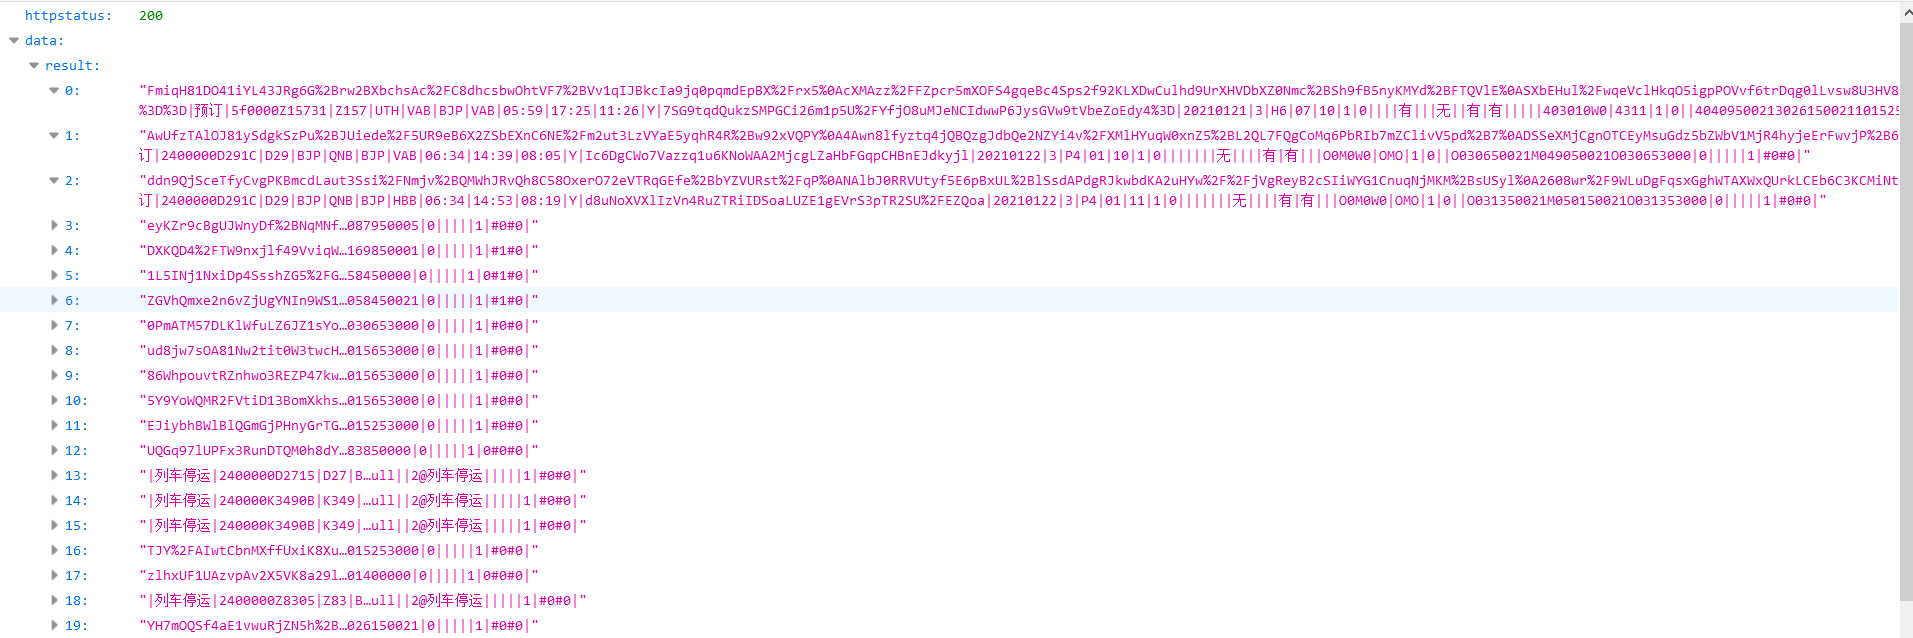

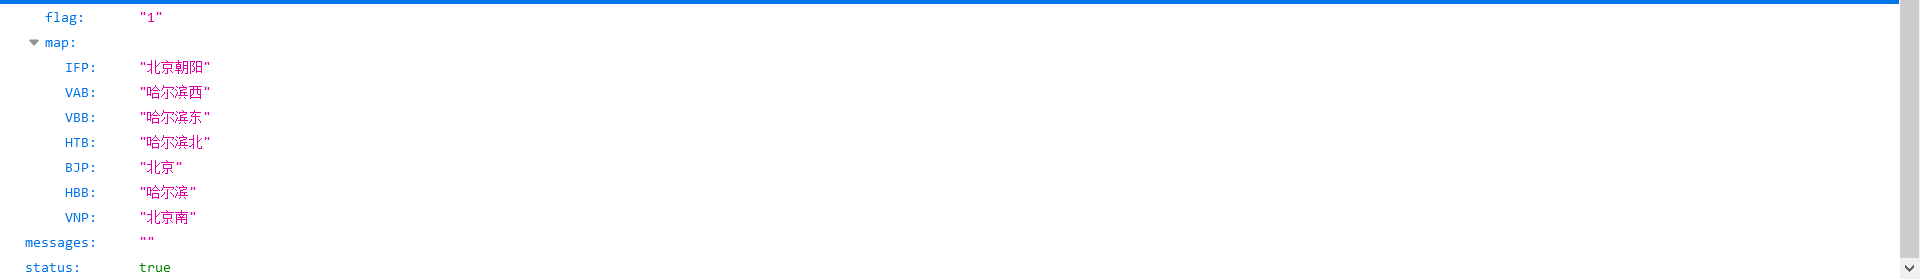


把它保存为文件BJP2HBB.json  文件里面一共有26个车次和一些代码与车站的映射，那接下来我们把它转换成正常可以读的方式

我注释把思路写的很清楚了，如果有什么函数或者语法上不懂的，就直接去百度搜就好了

到我们人工去处理json文件的结构的时候，可能他整个文件都只写在一行，看起来非常的费劲，那这个时候我们可以用到一些线上的工具，比如https://www.json.cn/ 这是一个json格式在线解析和格式化的线上工具。可以比较有效的把那种一行的不太符合人类阅读习惯的文件去做一下转换

In [105]:
import json

with open("BJP2HBB.json","r") as jsonFile: # 把文件打开
    jsonFile = jsonFile.read()# 读入所有的内容
    jsonFile = json.loads(jsonFile)# 使用json库把字符串转成可以识别的格式
    
trainNumList = jsonFile['data']['result']# 提取出车次信息
trainMap = jsonFile['data']['map']# 提取出站点代码跟站点的映射关系

for trainNum in trainNumList[:5]:# 循环处理所有车次信息.为了缩短输出，只处理前5项

    print(trainNum.split('|')[3],end=" ")# 输出车次号码
    
    startStationsTimes = trainNum.split('|')[6:9:2]# 提取出起始站点代码和发车时间   6和8
    endStationsTimes   = trainNum.split('|')[7:10:2]# 提取出到达站点和到达时间  7和9

    for stationsTime in [startStationsTimes,endStationsTimes] :    
        print(trainMap[stationsTime[0]],end=" ")# 输出站点名称，把站点代码映射为站点名称
        print(stationsTime[1],end=" ")# 输出发车或者到达时间
        
    print()# 换行
        


Z157 北京 05:59 哈尔滨西 17:25 
D29 北京 06:34 哈尔滨西 14:39 
D29 北京 06:34 哈尔滨 14:53 
G393 北京南 07:00 哈尔滨 14:10 
G381 北京南 07:54 哈尔滨西 15:33 


那么一般当把文件里面的数据或者是标签之类的都处理出来之后，就可以进行数据的计算和分析了。

**xls&xlsx**

xls和xlsx是office独有的文件格式，它的文件的存储形式是二进制，所以里面的内容无法通过直接打开文件来读取，需要通过一些外部的包来进行中介，比如xlrd/xlwt/openpyxl

实际上是很不建议使用xls来进行数据文件的交换的，最大的问题在于它只支持16384列和1048576行。这个数据量看起来挺大但实际在处理大量数据时，很容易就会超出这个限制。

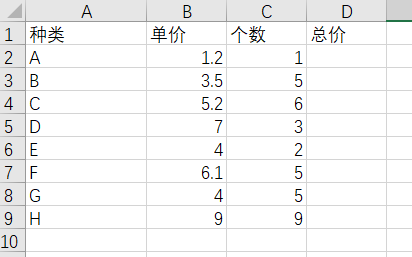


以上面这个样例文件入手，把总价计算出来。

In [158]:
import xlrd, xlwt
from xlutils.copy import copy

workbook = xlrd.open_workbook("xlsFiletest.xls")# 打开输入文件
worksheet = workbook.sheet_by_index(0)# 找到第1个工作表


price = worksheet.col_values(1)# 把单价读出来
print(price)
count = worksheet.col_values(2)# 把数量读出来
print(count)


workbook = copy(workbook)# 通过copy把只读改为可读写
worksheet = workbook.get_sheet(0)

print("总价")
for rowCount in range(1,len(price)):
    totalPrice = round(float(price[rowCount])*float(count[rowCount]),2)# 计算总价
    print(totalPrice,end = " ")# 从屏幕上打印价格
    worksheet.write(rowCount,3,totalPrice)# 把价格写入工作表对应位置

workbook.save("xlsFileoutput.xls")# 保存文件


['单价', 1.2, 3.5, 5.2, 7.0, 4.0, 6.1, 4.0, 9.0]
['个数', 1.0, 5.0, 6.0, 3.0, 2.0, 5.0, 5.0, 9.0]
总价
1.2 17.5 31.2 21.0 8.0 30.5 20.0 81.0 